In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/original-instant-gratification/sample_submission.csv
/kaggle/input/original-instant-gratification/train.csv
/kaggle/input/original-instant-gratification/public_test.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
prefix = "/kaggle/input/original-instant-gratification"

train = pd.read_csv(f"{prefix}/train.csv")
test = pd.read_csv(f"{prefix}/public_test.csv")
submission = pd.read_csv(f"{prefix}/sample_submission.csv")

# 데이터 EDA

In [5]:
print(train.shape)
print(test.shape)

train.head()

(262144, 258)
(262144, 257)


,hasty-gold-flamingo-novice,smelly-chocolate-dogfish-fimbus,woolly-flax-moth-unsorted,homey-emerald-beagle-grandmaster,crabby-ochre-iguana-golden,geeky-ochre-cuscus-pembus,messy-pink-kiwi-sorted,pokey-plum-tarantula-grandmaster,snoopy-cream-wolfhound-expert,snoopy-olive-alligator-fepid,...,craggy-asparagus-bobcat-sorted,woozy-auburn-eleuth-golden,thirsty-myrtle-donkey-fimbus,geeky-amaranth-wolfhound-unsorted,randy-red-molly-learn,blurry-chocolate-ostrich-pembus,silly-indigo-jackal-distraction,squirrely-amber-rabbit-golden,target,id
0,-0.240843,0.669289,1.160184,-0.573209,-0.440210,0.388965,0.915280,-3.793648,-3.170306,-3.182759,...,-1.355371,1.392273,0.163552,-2.256503,0.369001,-0.361916,0.619573,-0.389555,0,10a93253fe00464ea15eab10de90586e
1,1.608256,-1.455912,1.746242,0.607801,-0.232878,1.270233,1.502691,-4.490344,5.255972,0.397289,...,-0.725718,-0.706937,-1.188186,0.855840,1.317566,0.918572,0.647208,0.071944,0,a957370a7ace4aba88ac0deab67b428c
2,1.140167,-0.176490,-0.143334,0.343171,1.819834,-1.248593,1.474585,0.535093,0.518351,1.495391,...,0.147577,0.043999,0.495767,3.544278,-0.908622,-0.352353,-0.323102,0.157504,0,a304905e2f2e4436a63f76fc819366cc
3,-0.423482,-0.362538,1.419445,1.801446,-0.509476,0.058142,0.767237,0.066139,1.150455,-0.675730,...,-3.457079,-0.310069,-0.220163,-1.966893,-0.995738,1.369153,-1.506829,-1.022390,1,1403d81e619042d99a23d02655a4de3d
4,0.390466,-4.331849,0.151369,2.314972,-0.979106,2.979856,0.623208,-4.332396,0.045610,-0.608441,...,-0.516081,-6.491366,-1.681668,-1.029675,-0.298548,0.462082,-2.091140,1.513240,1,dfcd941dbeec47ec819bb643f358b651


In [6]:
test.head()

,hasty-gold-flamingo-novice,smelly-chocolate-dogfish-fimbus,woolly-flax-moth-unsorted,homey-emerald-beagle-grandmaster,crabby-ochre-iguana-golden,geeky-ochre-cuscus-pembus,messy-pink-kiwi-sorted,pokey-plum-tarantula-grandmaster,snoopy-cream-wolfhound-expert,snoopy-olive-alligator-fepid,...,sickly-pear-squirt-hint,craggy-asparagus-bobcat-sorted,woozy-auburn-eleuth-golden,thirsty-myrtle-donkey-fimbus,geeky-amaranth-wolfhound-unsorted,randy-red-molly-learn,blurry-chocolate-ostrich-pembus,silly-indigo-jackal-distraction,squirrely-amber-rabbit-golden,id
0,1.356264,-4.692978,-1.919519,-0.274090,-1.856044,0.091362,-1.150188,-1.532195,-0.914787,-1.351634,...,1.961188,0.759212,-0.384854,-3.383708,-0.691180,-0.330268,-0.031935,-4.922042,0.342678,7e04164ab5474722a8e8769be180c49b
1,2.676820,0.747812,-11.637889,-2.826083,0.624995,2.951990,-0.081312,-1.753502,5.480093,0.195924,...,-3.420254,-1.284003,-0.606059,0.157239,-0.593014,0.307527,0.123413,-0.985160,1.772089,9be58835560740cd859509829787a16a
2,0.927375,0.594631,-0.551580,-0.209135,-0.314451,-0.829020,-0.471844,0.502510,-0.169599,-1.113857,...,-5.140270,-0.481427,-0.468010,1.980010,1.625361,-2.132926,-0.625721,-2.786743,-1.524148,610533fd0daf42f09f8c82584405dae1
3,-2.232130,-1.822427,-0.666803,-0.164591,-1.782137,-1.275924,0.396353,-0.782434,-0.155128,0.132012,...,-3.023697,-0.631542,1.332816,-1.348062,-0.236678,-4.765953,8.271082,-1.264021,-1.142482,37a42a9dc457492e9d369719a6c73c4e
4,0.822598,-0.539835,-0.552801,-1.140408,-4.918491,-4.406279,0.744320,1.322257,-0.116757,-0.414655,...,0.805636,-1.050027,-0.975920,-1.090375,2.475332,0.142372,0.442017,-1.123248,0.389116,75e7821914aa4699acf55afb37cc22d0


In [7]:
print(train['target'].value_counts())

target
0    131079
1    131065
Name: count, dtype: int64


<Axes: >

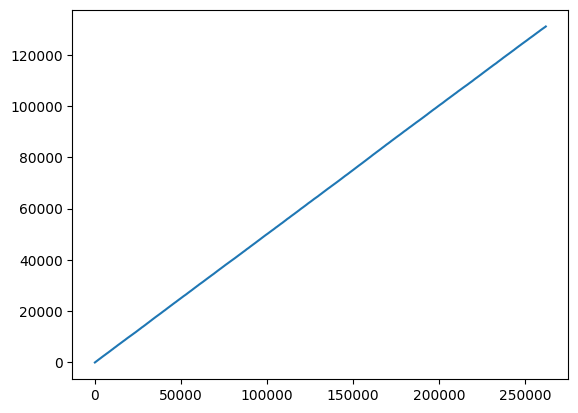

In [8]:
train['target'].cumsum().plot()

In [9]:
print(train.isnull().sum())
print(train.isnull().sum().sum())

hasty-gold-flamingo-novice          0
smelly-chocolate-dogfish-fimbus     0
woolly-flax-moth-unsorted           0
homey-emerald-beagle-grandmaster    0
crabby-ochre-iguana-golden          0
                                   ..
blurry-chocolate-ostrich-pembus     0
silly-indigo-jackal-distraction     0
squirrely-amber-rabbit-golden       0
target                              0
id                                  0
Length: 258, dtype: int64
0


In [10]:
train.dtypes.value_counts()

float64    255
int64        2
object       1
Name: count, dtype: int64

In [11]:
train.select_dtypes(include=["object", "int64"]).head()

,wheezy-copper-turtle-magic,target,id
0,158,0,10a93253fe00464ea15eab10de90586e
1,358,0,a957370a7ace4aba88ac0deab67b428c
2,290,0,a304905e2f2e4436a63f76fc819366cc
3,471,1,1403d81e619042d99a23d02655a4de3d
4,127,1,dfcd941dbeec47ec819bb643f358b651


In [12]:
# id, target을 제외한 train 열 선택
train_columns = [col for col in train.columns if col not in ["id", "target"]]
# print(train_columns)
print(train[train_columns].nunique())

hasty-gold-flamingo-novice           262144
smelly-chocolate-dogfish-fimbus      262144
woolly-flax-moth-unsorted            262144
homey-emerald-beagle-grandmaster     262144
crabby-ochre-iguana-golden           262144
                                      ...  
geeky-amaranth-wolfhound-unsorted    262144
randy-red-molly-learn                262144
blurry-chocolate-ostrich-pembus      262144
silly-indigo-jackal-distraction      262144
squirrely-amber-rabbit-golden        262144
Length: 256, dtype: int64


In [13]:
print(np.where(train[train_columns].nunique() < 250000))
print(train_columns[182])

(array([182]),)
wheezy-copper-turtle-magic


In [14]:
train["wheezy-copper-turtle-magic"].nunique()

512

In [15]:
# wheezy-copper-turtle-magic 열은 고유한 값이 512개 뿐이므로 다른 열에 비해 매우 작으며 인위적인 느낌이 듬 -> 추가적으로 분석
target = "wheezy-copper-turtle-magic"
print(train[target].value_counts().mean())

512.0


In [16]:
train[target].value_counts().rename_axis(target).reset_index(name="counts")

,wheezy-copper-turtle-magic,counts
0,14,513
1,459,513
2,292,513
3,296,513
4,355,513
...,...,...
507,395,511
508,182,511
509,366,511
510,419,511


## 수치형(float) 변수 확인

In [17]:
train_columns = [
    col for col in train.columns if col not in ["id", "target", "wheezy-copper-turtle-magic"]
]
describe_train = train[train_columns].describe().T.drop("count", axis=1)
cmap = sns.diverging_palette(5, 250, as_cmap=True)
describe_train.T.style.background_gradient(cmap, axis=1)

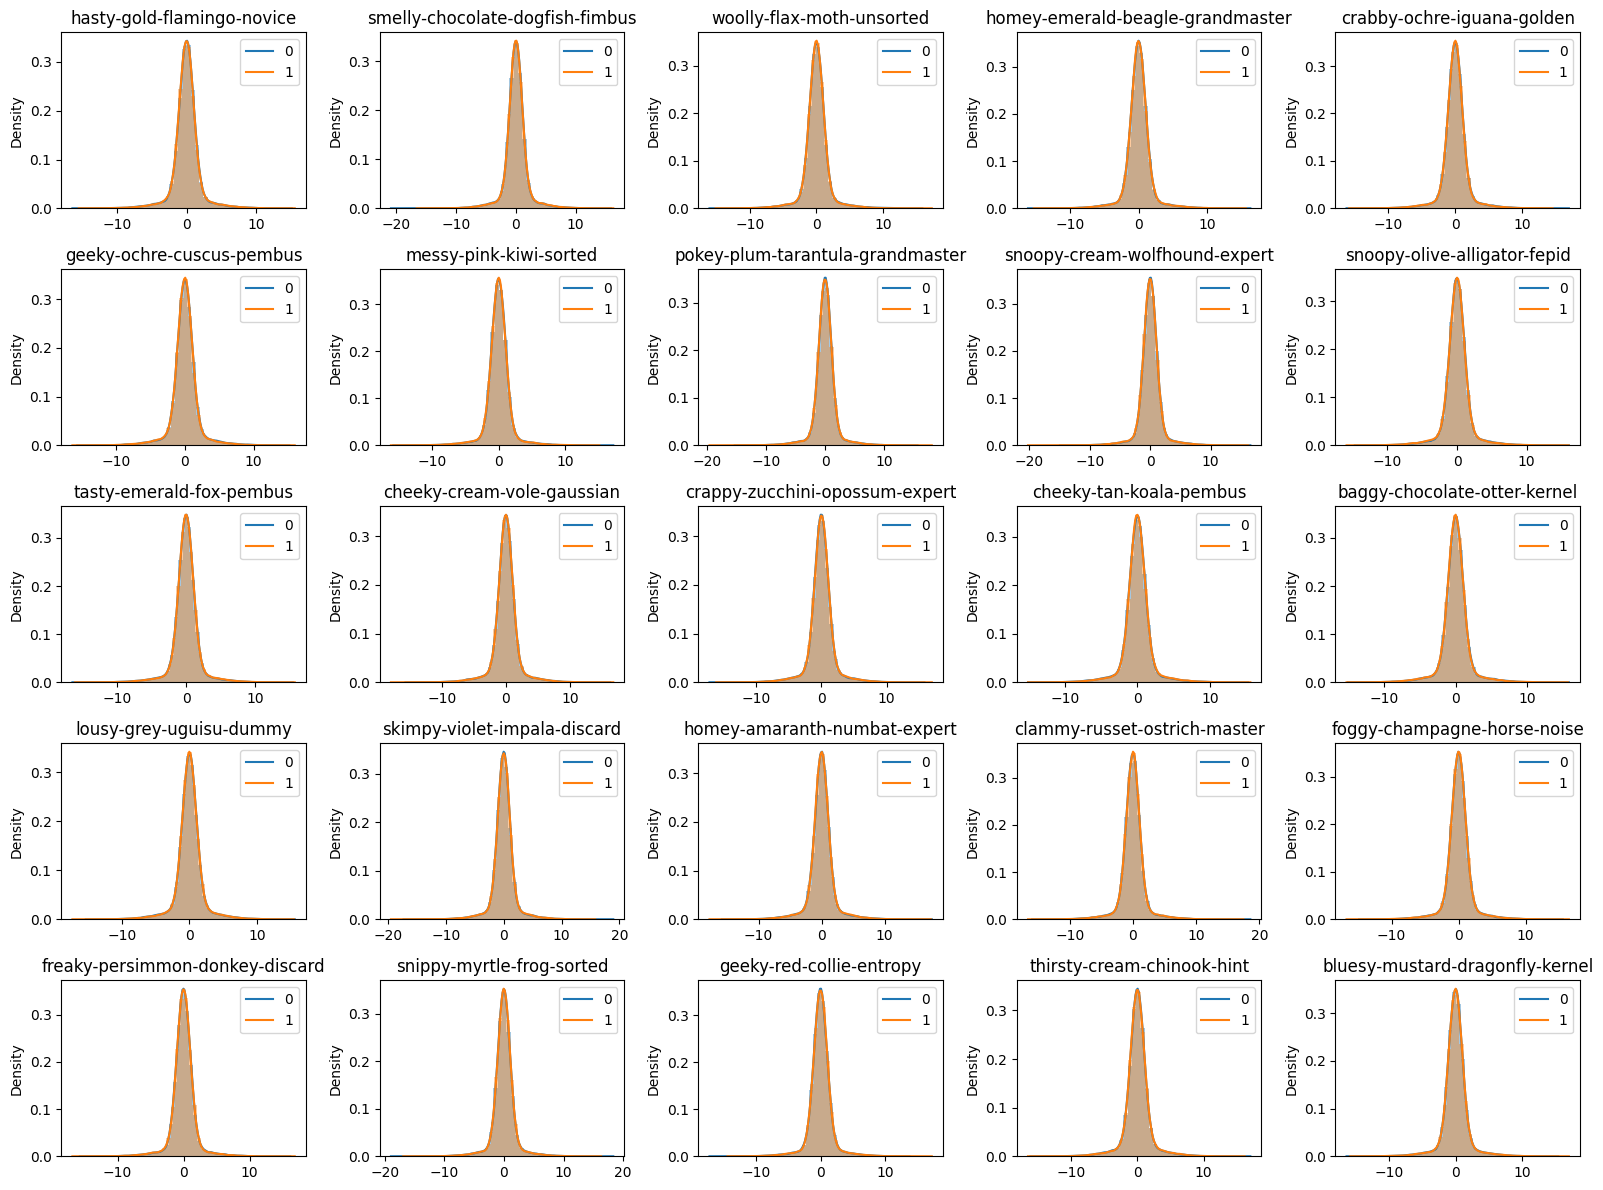

In [18]:
import warnings
warnings.filterwarnings('ignore')
train_columns = [
    col for col in train.columns if col not in ["id", "target"]
]
target = train["target"]
target_0_df = train.loc[train["target"] == 0]
target_1_df = train.loc[train["target"] == 1]

plt.figure(figsize=(16, 12))
for index, name in enumerate(train_columns[:25]):
    plt.subplot(5, 5, index + 1)
    sns.distplot(target_0_df[name])
    sns.distplot(target_1_df[name])
    plt.title(name)
    plt.xlabel("")
    plt.legend(["0", "1"])
    
plt.tight_layout()
plt.show()

## EDA 과정 정리
### 데이터의 형식 확인
- 열 안에 List나 Json의 형태가 있을 수 있고 그 안의 어떤 정보를 추출할 수 있는지 나열해 보는 것도 좋음
    
### 정답 값의 비율 확인
- 정답의 불균형 여부를 확인한 뒤 추후 고려하여 모델을 구성해야 함

### 정답 값 누출 확인
- 주최자가 의도하지 않은, 문제에 발생한 누출은 암묵적으로 공유되는 문화, 빠르게 캐치한다면 discussion이나 노트북에서 좋은 메달을 받을 수 있음

### NULL값 확인
- 알고리즘에 따라 NULL 값을 필수로 채워야 할 수도 있음
- 단순히 -999와 같은 값으로 채우기보다는 왜 NULL이 생성되었고 어떤 의미인지 먼저 파악하는 것이 좋음

### 범주형 변수와 수치형 변수를 나누기
- 각 특성에 따라 전처리하는 방법이 다르기 때문에 EDA 단계에서 미리 구분해두는 것이 좋음

### Feature는 정답값과 연관지어 생각하기
- 특정 범주형 변수에 정답 값의 분포가 몰려 있거나, 수치형 변수의 분포를 살펴봤을 때 정답 값별로 분포가 다르면 좋은 변수가 될 가능성이 큼

# 스태킹(Stacking)
- 여러 알고리즘이 예측한 결과를 입력으로 받아 재학습하여 결과를 도출하는 방법

In [19]:
# 스태킹의 입력 데이터를 만드는 예제코드
from sklearn.model_selection import KFold

#훈련, 테스트 데이터 결과를 담을 변수 준비
oof_train = np.zeros((len(train), 1))
oof_test = np.zeros((len(test), 1))

#교차 검증(Cross Validation) 방법을 정의
fold = KFold(n_splits=3, random_state=42, shuffle=True)

for trn_idx, val_idx in fold.split(train):
    x_tr, y_tr = train.iloc[trn_idx], target.iloc[trn_idx]
    x_val, y_val = train.iloc[val_idx], target.iloc[val_idx]
    # 실제 사용 모델, 여기서는 정의되지 않음
    model.fit(x_tr, y_tr)
    
    #검증 데이터 예측, val_idx로 선택하여 1/3 Fold 데이터만 변수에 저장
    oof_train[val_idx] = model.predict(x_val)
    
    #학습된 모델로 테스트 데이터도 예측 수행
    #3번 예측 수행에 대한 평균 내기
    oof_test += model.predict(test) / 3

NameError: name 'model' is not defined

In [ ]:
# 모델 4개를 사용했다고 가정했을 때, 다음과 같이 4개의 결과를 합쳐서 하나의 2단계 입력 값을 만듬

train_2nd_input = np.concatenate(
    (oof_train_model1, oof_train_model2, oof_train_model3, oof_train_model4), axis=1
)
train_2nd_input = np.concatenate(
    (oof_test_model1, oof_test_model2, oof_test_model3, oof_test_model4), axis=1
)

# 2단계 예측 결과를 담을 변수 생성
oof_train_2nd = np.zeros((len(train_2nd_input), 1))
oof_test_2nd = np.zeros((len(test_2nd_input), 1))

fold = KFold(n_splits=3, random_state=42)
for trn_idx, val_idx in fold.split(train):
    x_tr, y_tr = train_2nd_input.iloc[trn_idx], target.iloc[trn_idx]
    x_val, y_val = train_2nd_input.iloc[val_idx], target.iloc[val_idx]
    model.fit(x_tr, y_tr)
    
    # 예측 수행 후 결과 저장
    oof_train_2nd[val_idx] = model.predict(x_val)
    test_2nd_input += model.predict(test_2nd_input) / 3

## 스태킹의 성능을 올리는법
- 모델에 들어가는 Feature를 다르게 하여 다양성 추가
- 같은 모델이더라도 Parameter를 다르게 함
- 다양한 모델을 추가함
    - Tree 기반 모델, KNN, 신경망, 선형 모델 등과 같은 여러 모델 사용
- 2단계 모델을 다양하게 시도해보고 여러 모델의 결과를 다시 스태킹하거나 평균 값을 취할 수 있음

In [21]:
# Hyperopt 라이브러리를 통해 파라미터 서치
svnu_params = {
    "probability" : True,
    "kernel": "poly",
    "degree": 4,
    "gamma": "auto",
    "nu": 0.4,
    "coef0": 0.08,
    "random_state": 4
}
svnu2_params = {
    "probability" : True,
    "kernel": "poly",
    "degree": 2,
    "gamma": "auto",
    "nu": 0.4,
    "coef0": 0.08,
    "random_state": 4
}
qda_params = {"reg_param": 0.111}
svc_params = {
    "probability": True,
    "kernel": "poly",
    "degree": 4,
    "gamma": "auto",
    "random_state": 4
}
neighbor_params = {"n_neighbors": 16}
lr_params = {"solver": "liblinear", "penalty": "l1", "C": 0.05, "random_state": 42}

In [22]:
from sklearn import svm
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import neighbors
from sklearn import linear_model

def run_model(clf_list, train, test, random_state, gmm_init_params="kmeans"):
    MODEL_COUNT = len(clf_list)
    oof_train = np.zeros((len(train), MODEL_COUNT))
    oof_test = np.zeros((len(test), MODEL_COUNT))
    return oof_train, oof_test
    
nusvc_model = svm.NuSVC(**svnu_params)
nusvc2_model = svm.NuSVC(**svnu2_params)
qda_model = QuadraticDiscriminantAnalysis(**qda_params)
svc_model = svm.SVC(**svc_params)
knn_model = neighbors.KNeighborsClassifier(**neighbor_params)
lr_model = linear_model.LogisticRegression(**lr_params)

model_list = [nusvc_model, nusvc2_model, qda_model, svc_model, knn_model, lr_model]
oof_train_kmeans_seed1, oof_test_kmeans_seed1 = run_model(model_list, train, test, 1)
oof_train_kmeans_seed2, oof_test_kmeans_seed2 = run_model(model_list, train, test, 2)
oof_train_random_seed1, oof_test_random_seed1 = run_model(
    model_list, train, test, 1, "random"
)
oof_train_random_seed2, oof_test_random_seed2 = run_model(
    model_list, train, test, 2, "random"
)

### 범주형 값에 따라 모델 나누기
- wheezy-copper-turtle-magic만 다른 feature와 다르게 512개로만 구성되어 있음. 따라서 해당 feature별로 모델을 나누어 분류 시도

In [ ]:
!pip install tqdm

In [28]:
from tqdm import tqdm

train_coluns = [
    col for col in train.columns if col not in [
        "id", "target", "wheezy-copper-turtle-magic"
    ]
]

for idx in tqdm(range(512)):
    x_train = train[train["wheezy-copper-turtle-magic"] == idx]
    x_test = test[test["wheezy-copper-turtle-magic"] == idx]
    
    train_idx_origin = x_train.index
    test_idx_origin = x_test.index
    
    train_std = x_train[train_columns].std()
    cols = list(train_std.index.values[np.where(train_std > 2)])
    

100%|██████████| 512/512 [00:04<00:00, 105.99it/s]


### wheezy-cooper-tutrle-magic이 0일 때 target별 변수 분포 확인

0.9353990018343853
1.027124141541671
0.9488892541186732
0.9813977926255033
3.992549441195614
1.0041794583406853
0.9989265248828605
0.975101679598257
3.70061964895431
3.7254691240910587
1.0222651010064348
1.0482986049213252
1.0444754500550504
1.0038767919768483
0.9881713659161515
4.052215261600744


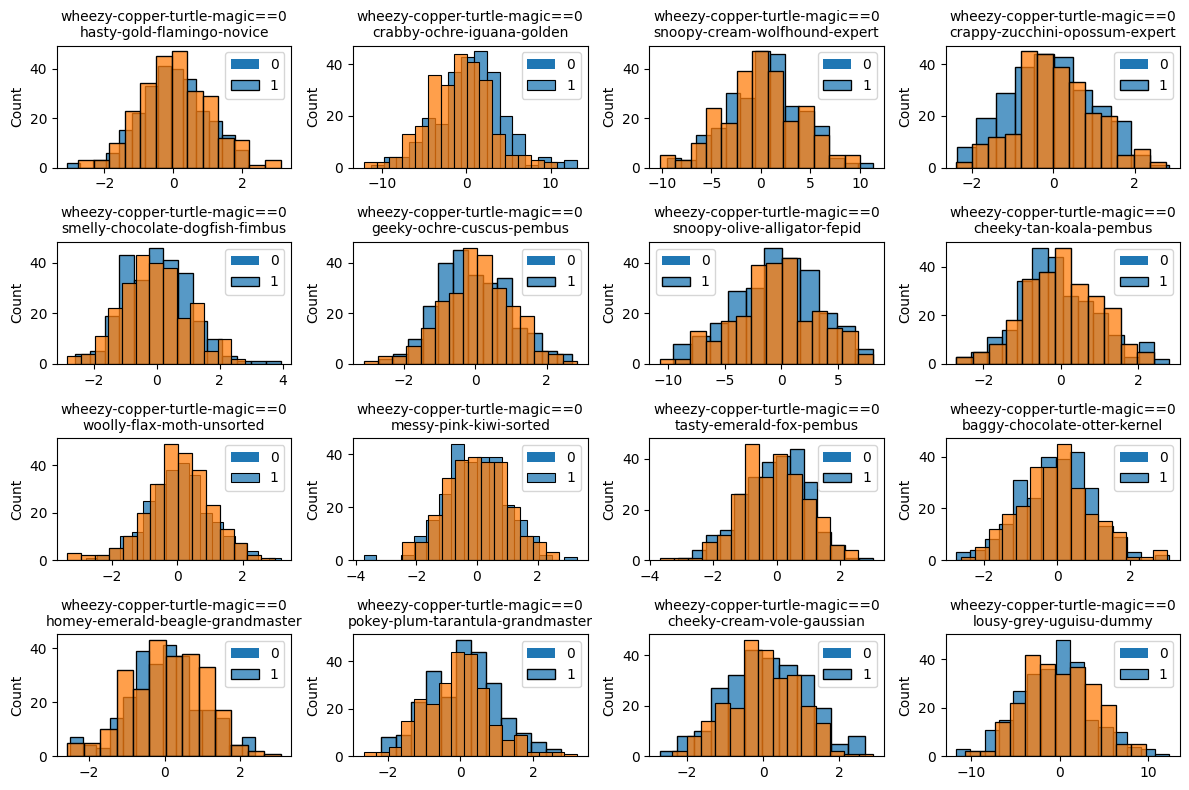

In [33]:
train_columns = [c for c in train.columns if c not in ['id','target']]
temp = train.loc[train['wheezy-copper-turtle-magic']==0]
target_0_df = temp.loc[temp['target']==0]
target_1_df = temp.loc[temp['target']==1]
f, a = plt.subplots(4, 4, figsize=(12,8))
for i, name in enumerate(train_columns[:16]):
    row = int(i%4)
    col = int(i/4)
    ax = a[row][col]
    sns.histplot(target_0_df[name], ax=ax)
    sns.histplot(target_1_df[name], ax=ax)
    std = target_0_df[name].std()
    print(std)
    ax.set_title(f'wheezy-copper-turtle-magic==0\n{name}',fontsize=10)
    ax.set_xlabel('')
    ax.legend(['0','1'])
    
plt.tight_layout()
plt.show()

### EDA 정리
- 표준 편차 분포가 1 혹은 2이상의 데이터로 분류 가능
- 모든 데이터를 사용한 경우와 표준편차 그룹을 나누어 모델 학습했을 때의 정확도 비교
- 책에서는 해당 작업에 대한 코드느 스킵함 (추후 따로 진행), 책에서 실험적으로 얻은 결과 기록
  - 전체 열 사용 시 정확도: 0.7549
  - 표준편차가 2보다 작은 열만 사용 시 정확도: 0.4971
  - 표준편차가 2보다 큰 열만 사용 시 정확도: 0.9411
  
  
  
- 표준편차가 2보다 큰 열만 사용 했을 때 회귀 정확도가 매우 높아짐, 해당 데이터들만 학습에 사용
- 추가적으로 책에서는 실험적으로 성능을 올릴 수 있는 여러 feature를 추가했다고 함
    - KernelPCA 모델 또한 캐글 대회 중 Discussion에 공유되었던 PCA feature를 변형하여 사용함
    - kernel은 cosine, poly, rbf 등 여러 가지를 실험해보면서 cosine을 선택했다고 함

## 솔루션
- 코드양이 많아 주석으로 이해한 내용 정리

In [45]:
#solution code
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold

from sklearn.decomposition import KernelPCA

# GaussianMixture는 데이터 라벨값이 각각 다른 정규분포를 이루고 있는 경우 사용하기에 적합
from sklearn.mixture import GaussianMixture as GMM

from sklearn import svm, neighbors, linear_model, neural_network
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import lightgbm as lgbm

In [46]:
# Histogram feature는 빈도 수가 정답 값과 연관이 있을 때 좋은 성능을 보임
# 비슷한 방법으로 범주형 변수들을 빈도 수로 인코딩 하는 기법이 있음, Frequency Encoding이라고 부르며 자주 사용됨
class hist_model(object):
    
    def __init__(self, bins=50):
        self.bins = bins
        
    def fit(self, X):
        
        bin_hight, bin_edge = [], []
        
        for var in X.T:
            # Numpy Histogram을 사용해 구간화하고 도수값(bh)과 구간 경계값(bedge)을 저장
            bh, bedge = np.histogram(var, bins=self.bins)
            bin_hight.append(bh)
            bin_edge.append(bedge)
        
        self.bin_hight = np.array(bin_hight)
        self.bin_edge = np.array(bin_edge)

    def predict(self, X):
        
        scores = []
        for obs in X:
            obs_score = []
            for i, var in enumerate(obs):
                # 값이 어느 구간에 속하는지 계산
                bin_num = (var > self.bin_edge[i]).argmin()-1
                # 구간에 속하는 도수값을 저장
                obs_score.append(self.bin_hight[i, bin_num]) # find bin hitght
            # 각 구간에 속하는 도수에 대해 평균을 구함
            scores.append(np.mean(obs_score))
        
        return np.array(scores)

In [51]:
def run_model(clf_list, train, test, random_state, gmm_init_params='kmeans'):
    
    MODEL_COUNT = len(clf_list)
    
    oof_train = np.zeros((len(train), MODEL_COUNT))
    oof_test = np.zeros((len(test), MODEL_COUNT))
    train_columns = [c for c in train.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]
    
    for magic in tqdm_notebook(range(512)):
        x_train = train[train['wheezy-copper-turtle-magic'] == magic]
        x_test = test[test['wheezy-copper-turtle-magic'] == magic]
#         print("Magic: ", magic, x_train.shape, x_test.shape)
        
        train_idx_origin = x_train.index
        test_idx_origin = x_test.index
        
        train_std = x_train[train_columns].std()
        cols = list(train_std.index.values[np.where(train_std >2)])
        
        x_train = x_train.reset_index(drop=True)
        y_train = x_train.target
        
        x_train = x_train[cols].values
        x_test = x_test[cols].values
        
        all_data = np.vstack([x_train, x_test])
        # print("all_data: ", all_data.shape)
        # Kernel PCA 및 코사인 커널 적용
        all_data = KernelPCA(n_components=len(cols), kernel='cosine', random_state=random_state).fit_transform(all_data)
        
        # GMM
        # GMM은 데이터가 어느 정규 분포에 속할 것인지를 나타내는 Mixing Coefficient 값(확률)과 각 개별 정규 분포의 평균, 분산을 추정함
        # EM(Expectation and Maximization) 방법을 적용해 모수를 추정
        gmm = GMM(n_components=5, random_state=random_state, max_iter=1000, init_params=gmm_init_params).fit(all_data)
        gmm_pred = gmm.predict_proba(all_data)
        gmm_score = gmm.score_samples(all_data).reshape(-1, 1)
        gmm_label = gmm.predict(all_data)
        
        # hist feature
        hist = hist_model()
        hist.fit(all_data)
        hist_pred = hist.predict(all_data).reshape(-1, 1)
        
        all_data = np.hstack([all_data, gmm_pred, gmm_pred, gmm_pred, gmm_pred, gmm_pred])

        # Add Some Features
        all_data = np.hstack([all_data, hist_pred, gmm_score, gmm_score, gmm_score])
        
        # Standard Scaler를 사용해 데이터 표준화
        all_data = StandardScaler().fit_transform(all_data)

        # new train/test
        x_train = all_data[:x_train.shape[0]]
        x_test = all_data[x_train.shape[0]:]
        # print("data size: ", x_train.shape, x_test.shape)
        
        # StratifiedKFold를 사용해 Cross Validation을 구축함
        fold = StratifiedKFold(n_splits=5, random_state=None)
        for trn_idx, val_idx in fold.split(x_train, gmm_label[:x_train.shape[0]]):
            for model_index, clf in enumerate(clf_list):
                clf.fit(x_train[trn_idx], y_train[trn_idx])
                oof_train[train_idx_origin[val_idx], model_index] = clf.predict_proba(x_train[val_idx])[:,1]
                
                # 2023/03/02 데이터의 형식이 변경되어, x_test 예측 시 오류 발생하는 것 수정
                if x_test.shape[0] == 0:
                    continue
                    
                #print(oof_test[test_idx_origin, model_index].shape)
                #print(x_test.shape)
                #print(clf.predict_proba(x_test)[:,1])
                oof_test[test_idx_origin, model_index] += clf.predict_proba(x_test)[:,1] / fold.n_splits
    
    for i, clf in enumerate(clf_list):
        print(clf)
        print(roc_auc_score(train['target'], oof_train[:, i]))
        print()
        
    oof_train_df = pd.DataFrame(oof_train)
    oof_test_df = pd.DataFrame(oof_test)
    
    return oof_train_df, oof_test_df

In [48]:
svnu_params = {'probability':True, 'kernel':'poly','degree':4,'gamma':'auto','nu':0.4,'coef0':0.08, 'random_state':4}
svnu2_params = {'probability':True, 'kernel':'poly','degree':2,'gamma':'auto','nu':0.4,'coef0':0.08, 'random_state':4}
qda_params = {'reg_param':0.111}
svc_params = {'probability':True,'kernel':'poly','degree':4,'gamma':'auto', 'random_state':4}
neighbor_params = {'n_neighbors':16}
lr_params = {'solver':'liblinear','penalty':'l1','C':0.05,'random_state':42}

In [ ]:
nusvc_model = svm.NuSVC(**svnu_params)
nusvc2_model = svm.NuSVC(**svnu2_params)
qda_model = QuadraticDiscriminantAnalysis(**qda_params)
svc_model = svm.SVC(**svc_params)
knn_model = neighbors.KNeighborsClassifier(**neighbor_params)
lr_model = linear_model.LogisticRegression(**lr_params)

model_list = [nusvc_model, nusvc2_model, qda_model, svc_model, knn_model, lr_model]
oof_train_kmeans_seed1, oof_test_kmeans_seed1 = run_model(model_list, train, test, 1)
oof_train_kmeans_seed2, oof_test_kmeans_seed2 = run_model(model_list, train, test, 2)
oof_train_random_seed1, oof_test_random_seed1 = run_model(model_list, train, test, 1, 'random')
oof_train_random_seed2, oof_test_random_seed2 = run_model(model_list, train, test, 2, 'random')


  0%|          | 0/512 [00:00<?, ?it/s]

NuSVC(coef0=0.08, degree=4, gamma='auto', kernel='poly', nu=0.4,
      probability=True, random_state=4)
0.9484464209220532

NuSVC(coef0=0.08, degree=2, gamma='auto', kernel='poly', nu=0.4,
      probability=True, random_state=4)
0.9476969235365482

QuadraticDiscriminantAnalysis(reg_param=0.111)
0.9486394286786283

SVC(degree=4, gamma='auto', kernel='poly', probability=True, random_state=4)
0.9483712666243194

KNeighborsClassifier(n_neighbors=16)
0.9481461554800138

LogisticRegression(C=0.05, penalty='l1', random_state=42, solver='liblinear')
0.936959679233319



  0%|          | 0/512 [00:00<?, ?it/s]